# Song Popularity Prediction - Practical Topics in Machine Learning

Our final "practical topics in machine learning" project is prediction song popularity on Spotify application. 

Song popularity can be between 0 to 100 , therefore our  data science prediction problem is Regression.


## 0.1 Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor


# Loss function
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

# Validation
from sklearn.model_selection import train_test_split as split

from sklearn import preprocessing
from IPython.display import display, Math

# SHAP tools
import shap


## 0.2 Data Description

The dataset was uploaded to Kaggle in 06/2020 by Yamaç Eren Ay, who used the **Spotify Web API** for develepors to build a dataset and contains more than 160,000 tracks.

Spotify is one of the world’s largest music streaming service providers, with over 345 million monthly active users, including 155 million paying subscribers


The task in this dataset is to **predict the popularity of the track according to the track's features**.


Each row in the data represent a unique track, identified by a unique ID feature generated by Spotify.


   **The data has the following features**: 
    
    
    •	duration_ms

    •	key

    •	mode

    •	time_signature

    •	acousticness

    •	danceability

    •	energy

    •	instrumentalness

    •	liveness

    •	loudness

    •	speechiness

    •	valence

    •	tempo

    •	id

    •	type

    •	popularity

    •	name

    •	release_date

    •	year


## 0.3 First look at the data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

# Data preparation:

### **1.1 Exploration (EDA) & Visualizaiton**

### **1.2 Cleaning & Pre Processiong**



## 1.1 Exploration (EDA) & Visualizaiton

This section focuses on Data Exploration (EDA) as well as Visualizations.
This will help us identify outliers in data, detect trends and correlations between features.

We divided the features into Categorical and Numeric.


# Categorical Features 

The categorial features are Artist, Year, Popularity.

In addition there are also binary features as mode and explicit.

**Artists:** 


Who is performing the song, there are 36195 categories in this feature.

•	We see that not necessary that the most common artist are also the most popular.


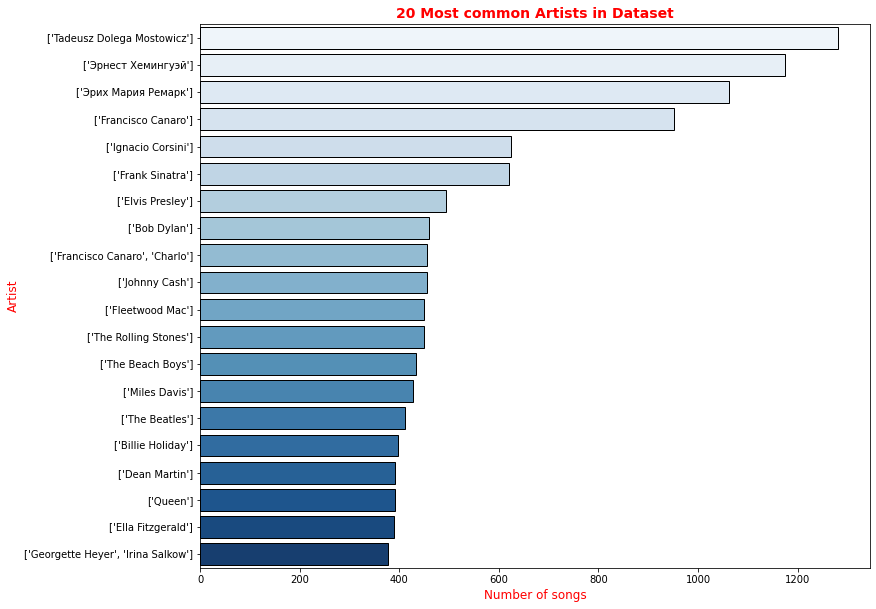

In [4]:
# # Plotting
figure, ax = plt.subplots(figsize = (12, 10))
top_artists = df['artists'].value_counts().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Number of songs', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most common Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

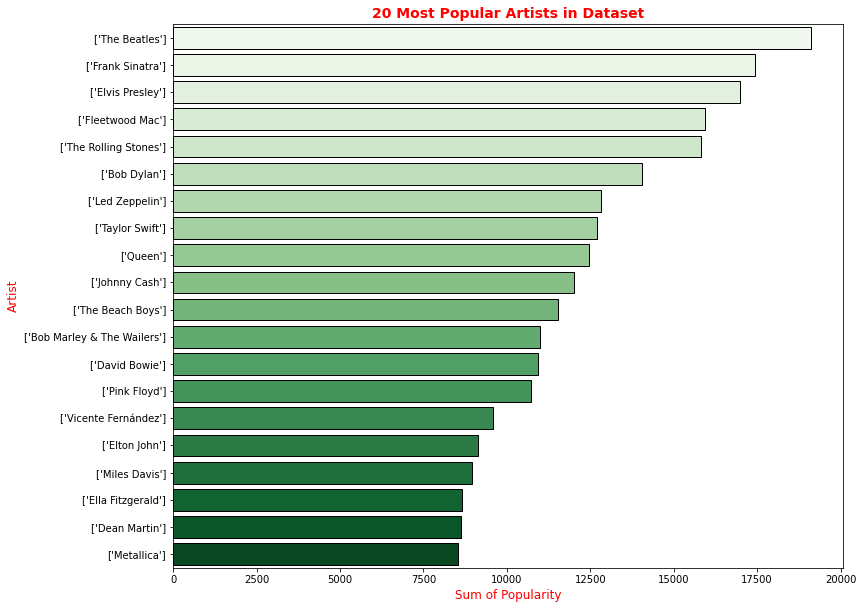

In [5]:
# # Plotting
figure, ax = plt.subplots(figsize = (12, 10))
top_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=top_artists.values, y=top_artists.index, palette="Greens", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

**Year:** 


When the song was released.

•	We see that the range is from 1921 to 2020.


<AxesSubplot:title={'center':'Number of songs per decade'}, xlabel='decade', ylabel='count'>

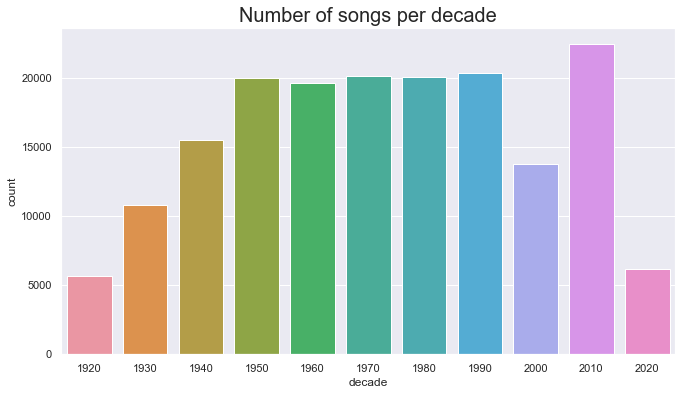

In [6]:
def get_decade(year):
    period_start = int(year/10) * 10
    return period_start

df['decade'] = df['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
b = sns.boxplot()
b.axes.set_title("Number of songs per decade",fontsize=20)
sns.countplot(df['decade'])

**Popularity:** 

This is our predict class. It represents the popularity of a song in Spotify.


•	The popularity ranges from 0 to 100.


•	We see that most of tracks recieves low popularity (0-10 score).



<AxesSubplot:title={'center':'Number of songs per Popularity range'}, xlabel='popRange', ylabel='count'>

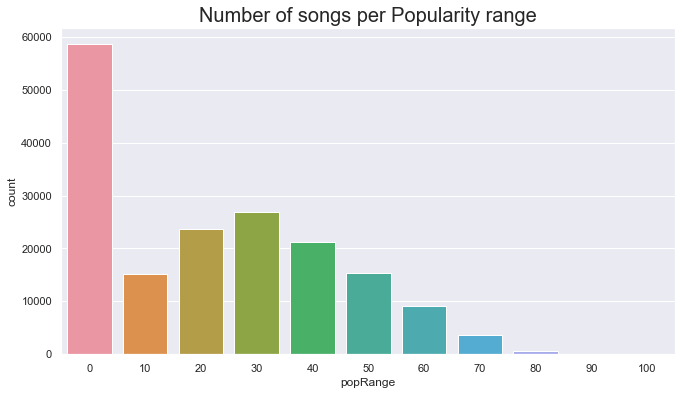

In [7]:
def get_range(popularity):
    period_start = int(popularity/10) * 10
    return period_start

df['popRange'] = df['popularity'].apply(get_range)

sns.set(rc={'figure.figsize':(11 ,6)})
b = sns.boxplot()
b.axes.set_title("Number of songs per Popularity range",fontsize=20)
sns.countplot(df['popRange'])

**Binary Features:** 
 
**Explicit:**  
This feature is binary value whether the track contains explicit content or not. 
The explicit logo is applied when the lyrics or content of a song contain one or more of the following criteria which could be considered offensive or unsuitable for children:

•	strong language (one word is already enough); 

•	references to violence, physical, or mental abuse;

•	references to sexual behaviour;

•	discriminatory language. 

We see that most of tracks were without explicit content.


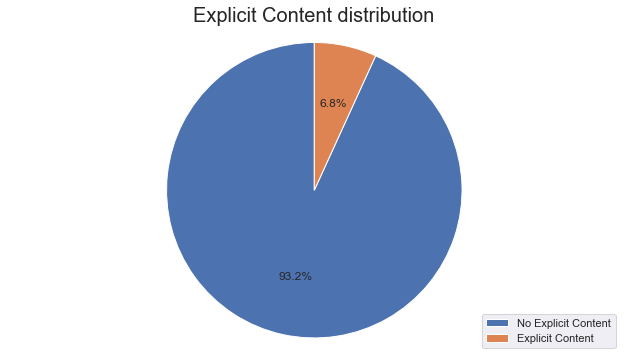

In [8]:

sizes = df['explicit'].value_counts()
plt.pie(sizes, startangle=90, autopct='%1.1f%%')
plt.title("Explicit Content distribution", size=20)
state = ["No Explicit Content","Explicit Content"]

#plt.pie(cases,shadow=True, radius=3)
plt.legend(state, loc="lower right")
plt.axis('equal')

plt.show()


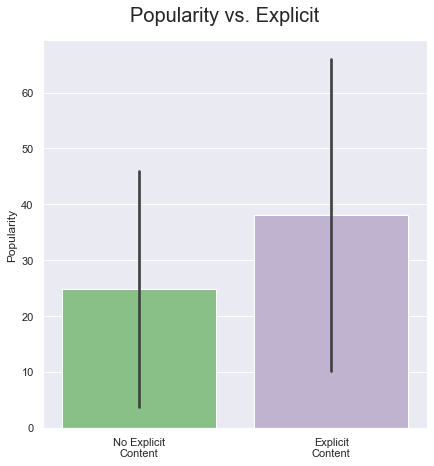

In [9]:
exp_data = sns.catplot(data=df, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Accent',
                        height=6)
exp_data.fig.suptitle('Popularity vs. Explicit', y=1.05, fontsize=20)
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

**Mode:**  
This feature is binary representing whether the track starts with a major (1) chord progression or not (0).

We see that most of tracks starts with Major chord

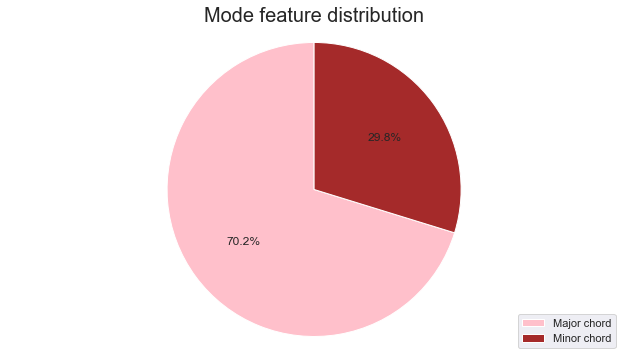

In [10]:
labels= ['Major chord', 'Minor chord']
colors=['pink', 'brown']


sizes = df['mode'].value_counts()
plt.pie(sizes,colors = colors, startangle=90, autopct='%1.1f%%')
plt.title("Mode feature distribution", size=20)
plt.legend(labels, loc="lower right")
plt.axis('equal')

plt.show()

# Numeric Features¶

Most of the features are Numeric.



**Acousticness:** 

The relative metric of the track being acoustic Artists - The list of artists credited for production of the track.


•	We see that most of values are close to 0 or 1 and less in the middle.


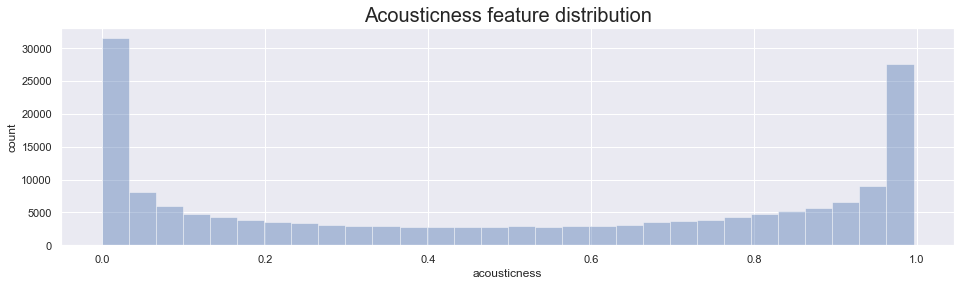

In [11]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(df['acousticness'], kde=False, bins=30)
plt.ylabel("count")
plt.title("Acousticness feature distribution",fontsize=20)
plt.show()

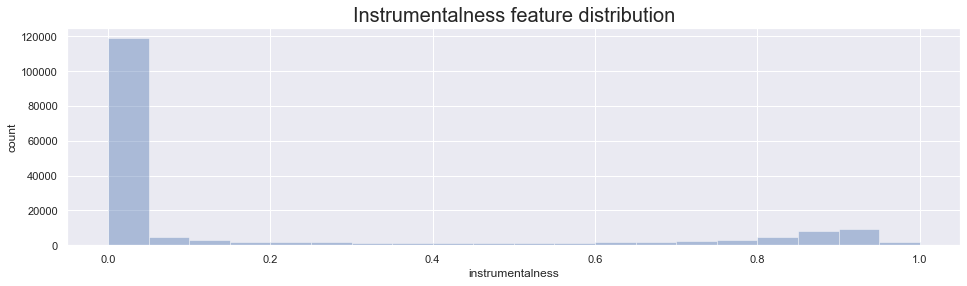

In [12]:
fig, axes = plt.subplots(figsize=(16, 4))
sns.distplot(df['instrumentalness'], kde=False, bins=20)
plt.title("Instrumentalness feature distribution",fontsize=20)
plt.ylabel("count")
plt.show()

**Duration:** 

The feature duration_ms  represents the length of the track in milliseconds.
For our convenience, We first converted the milliseconds data to minutes.





•	We see that most of the tracks are less than 10 minutes.

•	When comparing the popularity of the tracks, we see that as the length increases, the popularity decreases.


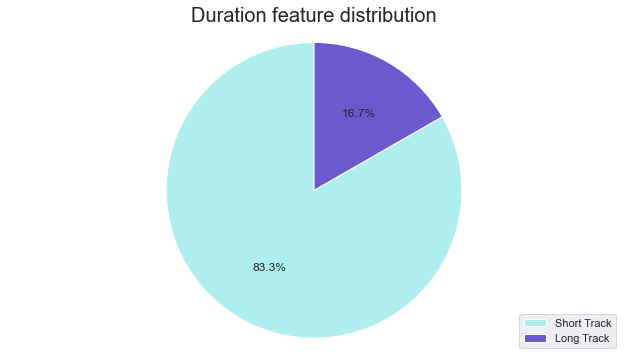

In [13]:
df['duration_min'] = df['duration_ms']/60000


def get_dur(duration_min):
    if duration_min>5:
        return 0
    else:
        return 1


df['is_short'] = df['duration_min'].apply(get_dur)

labels= ['Short Track', 'Long Track']
colors=['paleturquoise','slateblue']


sizes = df['is_short'].value_counts()
plt.pie(sizes,colors = colors, startangle=90, autopct='%1.1f%%')
plt.title("Duration feature distribution", size=20)
plt.legend(labels, loc="lower right")
plt.axis('equal')

plt.show()


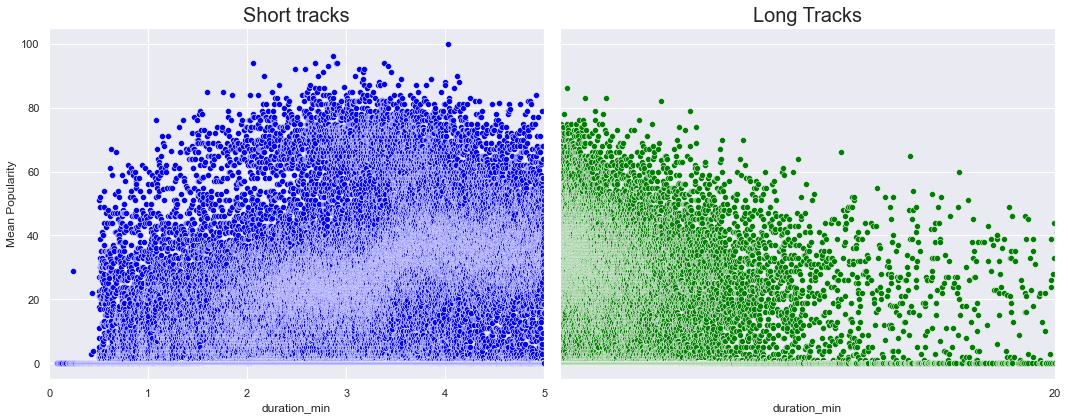

In [14]:
long_tracks = df.loc[df['duration_min']>5]
short_tracks = df.loc[df['duration_min']<=5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Short Tracks
ax1_data =  short_tracks.groupby('duration_min')['popularity'].mean().to_frame().reset_index()
ax1 = sns.scatterplot(x='duration_min', y='popularity', data=ax1_data, color='blue', ax=ax1)
ax1.set_xticks(range(0,20,1))
ax1.set_xlim(0,5)
ax1.set_title('Short tracks', fontsize = 20)

# Long Tracks
ax2_data =  long_tracks.groupby('duration_min')['popularity'].mean().to_frame().reset_index()
ax2 = sns.scatterplot(x=ax2_data['duration_min'], y=ax2_data['popularity'], color='green', ax=ax2)
ax2.set_xticks(range(20,101,10))
ax2.set_xlim(5,20)
ax2.set_title('Long Tracks', fontsize = 20)
font = {'family': 'serif',
        'color':  'red',
        'weight': 'normal',
        'size': 16,
        }
ax1.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

**Danceability:** 

The feature measure if the song is dancable based on the combination of tempo rythm and beat strength.


•	We see that the values are between 0 to 1. 

•	The majoirity of Danceability values is between 0.3-0.7.

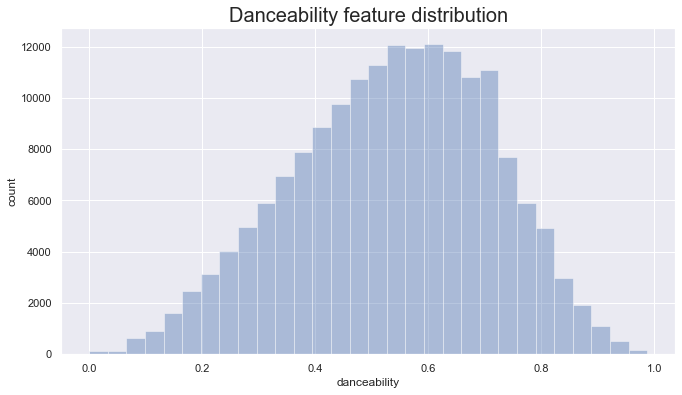

In [15]:
sns.distplot(df['danceability'],kde=False, bins=30)
plt.title("Danceability feature distribution",fontsize=20)
plt.ylabel("count")
plt.show()

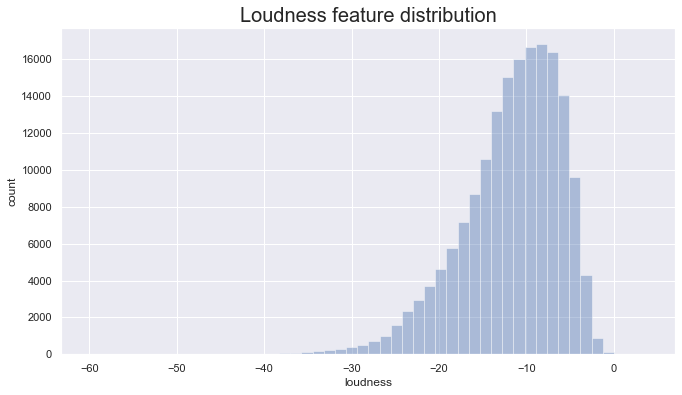

In [16]:
sns.distplot(df['loudness'],kde=False, bins=50)
plt.title("Loudness feature distribution",fontsize=20)
plt.ylabel("count")
plt.show()

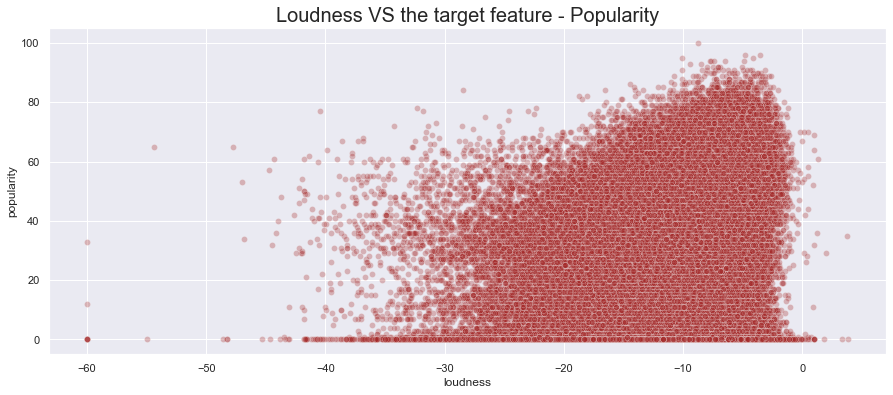

In [17]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='loudness', y='popularity', data=df, color='brown', alpha=0.3)
plt.title("Loudness VS the target feature - Popularity", size = 20)
plt.show()

# 1.2 Cleaning the data and Pre-Processing

The cleaning data process includes the following:
1. Selecting the relevant and valuable features from the 19 features in the dataset.
2. Delete rows with missing or NULL values as well as duplicates.



### Features Selection

Looking closely at the features, there are some features to consider whether to include in the final model or not:

**Artists:** There are 36,195 unique features. Since we anticipate the artist will influence the popularity of the track, **this feature will remain and be handled separately**.

**Id:** id is unique for each track, therfore cannot assist a model and will be **dropped**.

**Name:** There are 137,013 unique values. In our opinion, this is a problematic categorical feature to insert in a model, and will be **dropped**.

**Release_date \ Year:** The year feature is a derivative to the release_date feature, therfore one of them should be excluded. Since the release date contains rows with full date and others with year only, **the release_date will be dropped**.
For the year feature - we decided as first try to drop it. (In the next analysis we will try to use this feature)

In [18]:
columns = ['id', 'name', 'artists', 'release_date', 'year']
for col in columns:
  print(f'{col:<15}: {df[col].nunique()} unique values')

id             : 172230 unique values
name           : 137013 unique values
artists        : 36195 unique values
release_date   : 11043 unique values
year           : 102 unique values


In [19]:
df = df.drop(labels=['id','name', 'release_date', 'year', 'popRange', 'decade', 'is_short', 'duration_ms'], axis=1)
df.shape

(174389, 15)

### Duplicates & Nulls

After the above features removal, there are some duplicates in the dataset.

Duplicates are removed so only the first copy of the duplicate will remain for the model.

There are not null values in the data set.

In [20]:
df.duplicated().sum()

3856

In [21]:
df = df[~df.duplicated() == 1]
df.shape

(170533, 15)

In [22]:
df.isnull().sum().sum()

0

# **Feature engineering**


###  2.1 Artists feature transformer from str to float

###  2.2 MinMaxScaling for relevant features

###  2.3 Target scaling (popularity / 100)

### 2.1 AritistsTransformer

When working with the data we notice that only the Artist feature is textual feature and not numeric.

We decided to replace object data of the artists with some numerical indicator that identify the artist.

We transferred the string to float.

In [23]:
le = preprocessing.LabelEncoder()

for col in df.columns.values:
  if df[col].dtypes == 'object':
    le.fit(df[col].values)
    df[col] = le.transform(df[col])


In [24]:
X_train, X_test, y_train, y_test = split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

### 2.2 MinMaxScaling for relevant features

rescaling the range of features to scale the range in [0, 1] 
for the relevant features: artists, duration_min, loudness, tempo, key.

In [25]:
scaler = MinMaxScaler()
cols = ['artists','duration_min','loudness','tempo', 'key']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

### 2.3  Target scaling (popularity / 100)


In [26]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

In [27]:
X_train.head()

,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,duration_min
39736,0.792000,0.076728,0.642,0.258,0,0.000000,0.909091,0.194,0.643661,0,0.9570,0.272673,0.713,0.024688
39047,0.000142,0.024977,0.449,0.969,0,0.830000,0.363636,0.479,0.823741,0,0.0521,0.525759,0.769,0.014544
129830,0.044900,0.111817,0.536,0.425,0,0.886000,0.181818,0.345,0.691739,1,0.0389,0.408790,0.700,0.039971
153675,0.003440,0.495400,0.626,0.813,0,0.000877,0.636364,0.679,0.890377,1,0.0307,0.466537,0.528,0.054884
150360,0.294000,0.061614,0.506,0.392,0,0.000006,0.818182,0.128,0.773174,1,0.0267,0.391865,0.225,0.042537


# Baseline Model

###  3.1 KNN Model

###  3.2 Linear Regression Model

### 3.1 KNN Model


In [28]:
knn_df = df.sample(frac=0.3)
#Split the data to train and test
X_train, X_test, y_train, y_test = split(knn_df.drop('popularity', axis=1), knn_df['popularity'], test_size = 0.2, random_state = 12345)

In [29]:
RMSE1_train, RMSE1_test, MAE1_train, MAE1_test, R2_train, R2_test = [], [], [], [], [], []
for i in range(5,101,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)

  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))

  knn_train_mae = mae(y_train, y_train_pred)
  MAE1_train.append(knn_train_mae.round(3))

  knn_train_r2 = r2(y_train, y_train_pred)
  R2_train.append(knn_train_r2.round(3))
  
  y_test_pred = knn.predict(X_test)
    
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))
  
  knn_test_mae = mae(y_test, y_test_pred)
  MAE1_test.append(knn_test_mae.round(3))

  knn_test_r2 = r2(y_test, y_test_pred)
  R2_test.append(knn_test_r2.round(3))

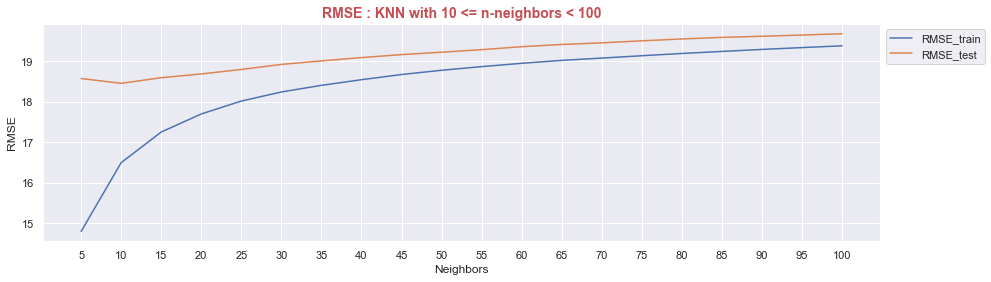

In [30]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('RMSE : KNN with 10 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

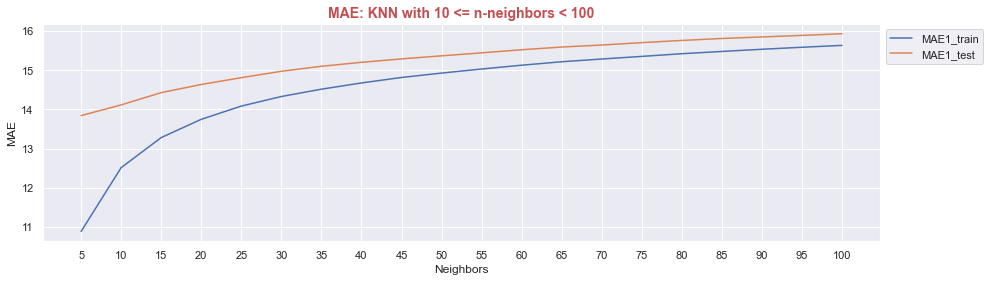

In [31]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=MAE1_train)
sns.lineplot(x=x, y=MAE1_test, ax=ax)
ax.legend(labels=['MAE1_train', 'MAE1_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('MAE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('MAE: KNN with 10 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

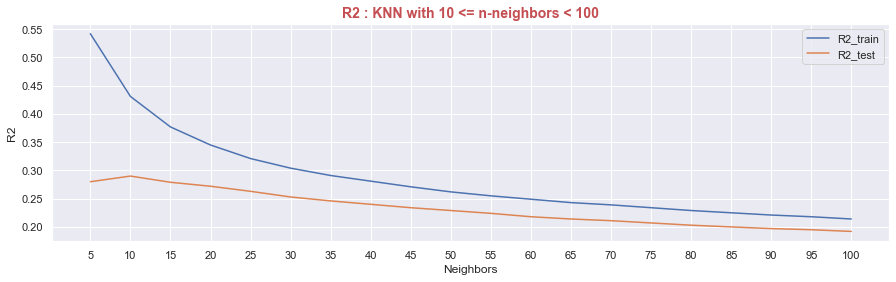

In [32]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 101, 5)
ax = sns.lineplot(x=x, y=R2_train)
sns.lineplot(x=x, y=R2_test, ax=ax)
ax.legend(labels=['R2_train', 'R2_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('R2')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('R2 : KNN with 10 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [33]:
print("KNN Results: ")

gap1 = [RMSE1_test[num]-RMSE1_train[num] for num, i in enumerate(RMSE1_train)]
print(f'RMSE Train: {RMSE1_train[gap1.index(min(gap1))]}, RMSE_test: {RMSE1_test[gap1.index(min(gap1))]}')

gap2 = [MAE1_test[num]-MAE1_train[num] for num, i in enumerate(MAE1_train)]
print(f'MAE Train: {MAE1_train[gap2.index(min(gap2))]}, MAE_test: {MAE1_test[gap2.index(min(gap2))]}')

gap3 = [R2_test[num]-R2_train[num] for num, i in enumerate(R2_train)]
print(f'R2 Train: {R2_train[gap3.index(min(gap3))]}, R2_test: {R2_test[gap3.index(min(gap3))]}')

KNN Results: 
RMSE Train: 19.38, RMSE_test: 19.678
MAE Train: 15.636, MAE_test: 15.933
R2 Train: 0.542, R2_test: 0.28


### 3.2 Linear Regression

In [34]:
#Split the data to train and test
lr_X_train, lr_X_test, lr_y_train, lr_y_test = split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

scaler = MinMaxScaler()
cols = ['artists','duration_min','loudness','tempo', 'key']
lr_X_train[cols] = scaler.fit_transform(lr_X_train[cols])
lr_X_test[cols] = scaler.fit_transform(lr_X_test[cols])

# Divide the popularity by 100
lr_y_train = lr_y_train / 100
lr_y_test = lr_y_test / 100

In [35]:
LR = LinearRegression()
# Fit the model and
LR.fit(lr_X_train, lr_y_train)

# Train Predicting with the model
y_train_pred = LR.predict(lr_X_train).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(lr_y_train, y_train_pred))

# MAE Train
LR_mae = mae(lr_y_train, y_train_pred)

# R2 Train
LR_r2 = r2(lr_y_train, y_train_pred)

#Predicting with the model
y_test_pred = LR.predict(lr_X_test).clip(0, 1)

# RMSE Test
LR_rmse_test = np.sqrt(mse(lr_y_test, y_test_pred))

# MAE Test
LR_mae_test = mae(lr_y_test, y_test_pred)

# R2 Test
LR_r2_test = r2(lr_y_test, y_test_pred)

print("Linear Regression Results: ")

print(f"RMSE Train = {LR_rmse:.6f}")
print(f"RMSE Test = {LR_rmse_test:.6f}")

print(f"MAE Train = {LR_mae:.6f}")
print(f"MAE Test = {LR_mae_test:.6f}")

print(f"R2 Train = {LR_r2:.6f}")
print(f"R2 Test = {LR_r2_test:.6f}")

Linear Regression Results: 
RMSE Train = 0.181771
RMSE Test = 0.181939
MAE Train = 0.145779
MAE Test = 0.145606
R2 Train = 0.305488
R2 Test = 0.307948


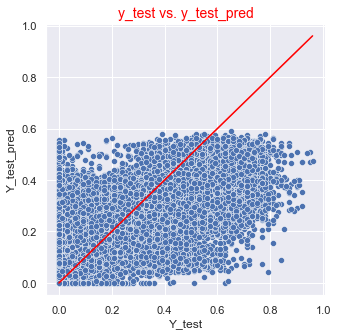

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.scatterplot(x=lr_y_test, y=y_test_pred)
sns.lineplot(x=lr_y_test, y=lr_y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

We can learn from the above graph that our model mistake is in the high values.


### Without target feature normalizing

We thought that the reason to the mistakes can be the fact that we normalize the target feature. 
So we tried running the Linear Regression model without normalizing this feature.

In [37]:
#Split the data to train and test
lr_X_train, lr_X_test, lr_y_train, lr_y_test = split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

LR = LinearRegression()
# Fit the model and
LR.fit(lr_X_train, lr_y_train)

# Train Predicting with the model
y_train_pred = LR.predict(lr_X_train).clip(0, 100)

# RMSE Train
LR_rmse = np.sqrt(mse(lr_y_train, y_train_pred))

# MAE Train
LR_mae = mae(lr_y_train, y_train_pred)

# R2 Train
LR_r2 = r2(lr_y_train, y_train_pred)

#Predicting with the model
y_test_pred = LR.predict(lr_X_test).clip(0, 100)

# RMSE Test
LR_rmse_test = np.sqrt(mse(lr_y_test, y_test_pred))

# MAE Test
LR_mae_test = mae(lr_y_test, y_test_pred)

# R2 Test
LR_r2_test = r2(lr_y_test, y_test_pred)

print("Linear Regression Results")

print(f"RMSE Train = {LR_rmse:.6f}")
print(f"RMSE Test = {LR_rmse_test:.6f}")

print(f"MAE Train = {LR_mae:.6f}")
print(f"MAE Test = {LR_mae_test:.6f}")

print(f"R2 Train = {LR_r2:.6f}")
print(f"R2 Test = {LR_r2_test:.6f}")

Linear Regression Results
RMSE Train = 18.177054
RMSE Test = 18.193922
MAE Train = 14.577910
MAE Test = 14.557115
R2 Train = 0.305488
R2 Test = 0.307944


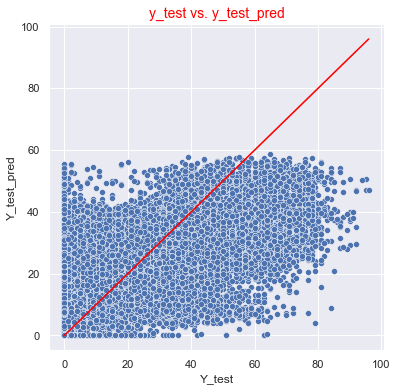

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=lr_y_test, y=y_test_pred)
sns.lineplot(x=lr_y_test, y=lr_y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

We can see that the normalization is not the reason to the 
model mistakes - we still got the same graph, indicating on mistakes in high values.

### Feature importance using SHAP

Permutation explainer: 501it [00:41, 11.34it/s]                                          


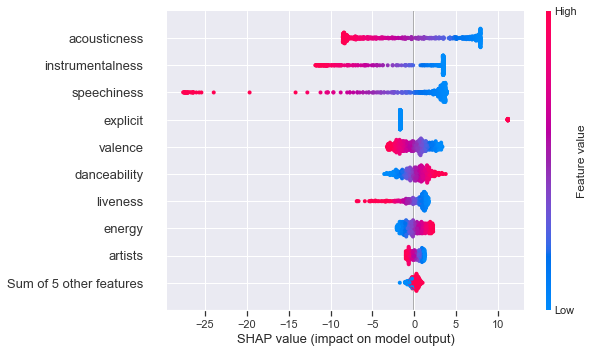

In [39]:
shap_sample = lr_X_train.sample(500)
explainer = shap.Explainer(LR.predict, shap_sample)
shap_values = explainer(shap_sample)
shap.plots.beeswarm(shap_values)


# Working to improve the model

We tried to make our model more efficient by the suggestions we recieved in class.

 
### 4.1 Target feature distributions of train and test
### 4.2 Try using Year feature
### 4.3 Coefficients equation
### 4.4 Feature Engineering 

### 4.1 Target feature distribution of train and test

<function matplotlib.pyplot.show(close=None, block=None)>

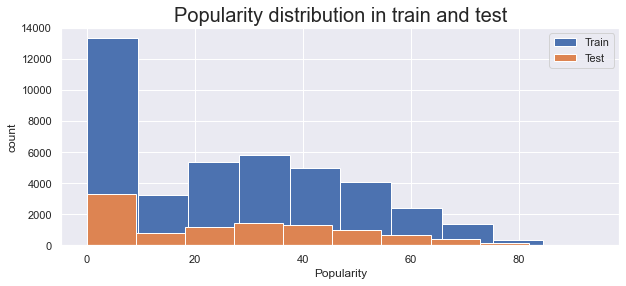

In [40]:
fig, ax = plt.subplots(figsize=(10,4))
y_train.hist(ax=ax)
y_test.hist(ax=ax)
plt.title("Popularity distribution in train and test", size = 20)
plt.ylabel("count")
plt.xlabel("Popularity")
labels = ['Train','Test']
plt.legend(labels, loc="upper right")
plt.show

We can see in the graph above that the target feature distribution is similar in the train and test.

### 4.2 Try using Year feature

In [41]:
# Read column names from file
cols = list(pd.read_csv('data.csv', nrows =1))
df = pd.read_csv('data.csv', usecols=[i for i in cols if i not in ['id','name','release_date','key']])
# Remove duplicated
df = df[~df.duplicated()==1]


We saw that most songs that released in 2021 got low popularity rate. The reason is that the year is not over yet.
We decided to drop the songs from 2021.

In [42]:
df = df.drop(df[df.year == 2021].index)

#Split the data to train and test
X_train, X_test, y_train, y_test = split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

### 4.3 Coefficients equation

After taining the model we wanted to see how the features affect the model. 
We defined a function that calculates the coefficient of every feature.
 

In [43]:
def get_printable_equt(df, inter, coef):
  equtation = '$y = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}$'
    else:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}'

  return display(Math(equtation))

get_printable_equt(lr_X_train, LR.intercept_, LR.coef_)

<IPython.core.display.Math object>

The results show us that the artisits feature got 0 as a coefficient.
This indicates a problem, because intuitively the artist is important when thinking about song popularity. 

### 4.4 Feature Engineering 

### Trasforming textual features to numeric feature using with context to our target feature.

In [44]:
class ArtistsTransformer():
  """ This converts 'artists' feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than 2 with y.mean()
  """

  def __init__(self, MinCnt = 2.0, MaxCnt = 600.0):
      self.MinCnt = MinCnt
      self.MaxCnt = MaxCnt
      self.artists_df = None
  
  def fit (self, X, y):
      self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
      self.artists_df.loc['unknown'] = [y.mean(), 1]
      self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
    
      return self

  def transform(self, X, y=None):
      X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
      X['artists'] = X['artists'].map(self.artists_df['mean'])
      return X

In [45]:
# Apply AritistsTransformer on train and test seperatly
artists_transformer = ArtistsTransformer()
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

### Convert instrumentalness values to three classes according to their distribution.
By looking at the data and dividing to differnet ranges of classes, we concluded that most songs are at the edge values (smaller than 0.2 and larger than 0.8).


Therefore decided to seperate them as the following:
0.0 - 0.2 = class 2
0.2 - 0.8 = class 1
0.8 - 1.0 = class 3

In [46]:
def instrumentalness_criteria(X):
    X['instrumentalness'] = list(map((lambda x: 2 if x < 0.2 else (3 if x > 0.8 else 1)), X.instrumentalness))

instrumentalness_tranformer = FunctionTransformer(instrumentalness_criteria)
instrumentalness_tranformer.transform(X_train)
instrumentalness_tranformer.transform(X_test)

### One Hot Encoding of instrumentalness feature to categorial feature.

We tried using those features without One Hot Encoding and the R-squared were smaller than when we used One Hot Encoding.

In [47]:
ohe = OneHotEncoder(categories='auto', drop='first')

# Train
feature_arr = ohe.fit_transform(X_train[['instrumentalness']]).toarray()
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_train['instrumentalness'].values))[1:]]
feature_labels = instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_train.index)
X_train = pd.concat([X_train, features], axis=1).drop(['instrumentalness'], axis=1)

# Test
feature_arr = ohe.fit_transform(X_test[['instrumentalness']]).toarray()
instrumentalness_key = ['ins_'+str(i) for i in list(set(X_test['instrumentalness'].values))[1:]]
feature_labels = instrumentalness_key
feature_labels = np.concatenate((feature_labels), axis=None)
features = pd.DataFrame(feature_arr, columns = feature_labels, index = X_test.index)
X_test = pd.concat([X_test, features], axis=1).drop(['instrumentalness'], axis=1)

### Normalization
After all the previous changes, we tested our model with and without normalizing our features. Without normalization - the coefs of our features didn't represent their proper weight.

In [48]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

# Training the Model after feature engineering

## Linear Regression

In [49]:
LR = LinearRegression()

# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(0, 100)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))

# MAE Train
LR_mae = mae(y_train, y_train_pred)

# R2 Train
LR_r2 = r2(y_train, y_train_pred)

#Predicting with the model
y_test_pred = LR.predict(X_test).clip(0, 100)

# RMSE Test
LR_rmse_test = np.sqrt(mse(y_test, y_test_pred))

# MAE Test
LR_mae_test = mae(y_test, y_test_pred)

# R2 Test
LR_r2_test = r2(y_test, y_test_pred)

print("Linear Regression Results: ")

print(f"RMSE Train = {LR_rmse:.6f}")
print(f"RMSE Test = {LR_rmse_test:.6f}")

print(f"MAE Train = {LR_mae:.6f}")
print(f"MAE Test = {LR_mae_test:.6f}")

print(f"R2 Train = {LR_r2:.6f}")
print(f"R2 Test = {LR_r2_test:.6f}")


Linear Regression Results: 
RMSE Train = 13.016941
RMSE Test = 13.642425
MAE Train = 9.293198
MAE Test = 9.945310
R2 Train = 0.643281
R2 Test = 0.608415


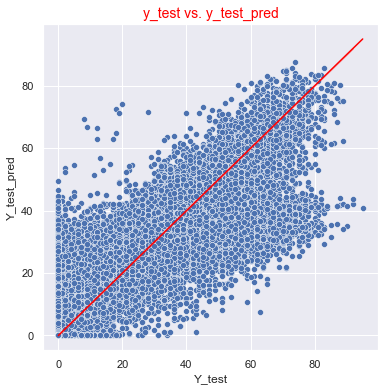

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

We can see that we improved the model! 

The model now predict also high values.

# Model Analysis

### 5.1 Coefficients equation

### 5.2 Feature importance using SHAP

### 5.1 Coefficients equation

In [51]:
def get_printable_equt(df, inter, coef):
  equtation = '$y = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}$'
    else:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}'

  return display(Math(equtation))

get_printable_equt(X_train, LR.intercept_, LR.coef_)

<IPython.core.display.Math object>

### Coefs conclusions:
By looking at the coefs we can see that the next features has high effect on our prediction:
- 𝑎𝑟𝑡𝑖𝑠𝑡𝑠
- 𝑒𝑥𝑝𝑙𝑖𝑐𝑖𝑡
- 𝑙𝑖𝑣𝑒𝑛𝑒𝑠𝑠
- 𝑒𝑛𝑒𝑟𝑔𝑦
- 𝑠𝑝𝑒𝑒𝑐ℎ𝑖𝑛𝑒𝑠𝑠

By the coefs we can see that the next features has less effect on our prediction:
- 𝑡𝑒𝑚𝑝𝑜
- 𝑚𝑜𝑑𝑒

**Now the Artists coefficient is not zero, the change we made cause the model to give the feature weight.**

Since some of the features are not normalized, it is hard to assess which ones are the most important.
For that, we use SHAP.

### 5.2 Feature importance using SHAP

Feature importance helps estimate how much each feature contributed to the model’s prediction. 

After performing feature importance tests, we can figure out which features are making the most impact on our model’s decision making.

In [52]:
shap_sample = X_train.sample(500)
explainer = shap.Explainer(LR.predict, shap_sample)
shap_values = explainer(shap_sample)


Permutation explainer: 501it [00:23, 12.20it/s]                                          


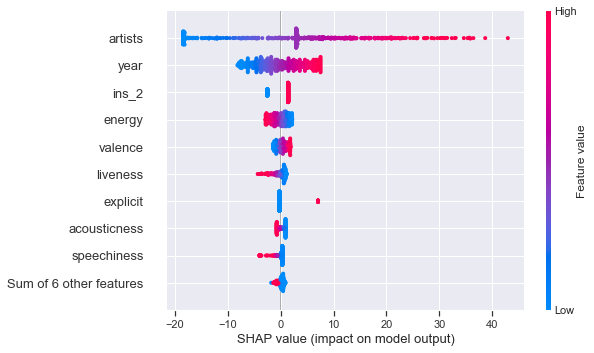

In [53]:
shap.plots.beeswarm(shap_values)

**We see that the most influential features are: artist and year.**

(The year feature was not very influential in the coefficients equation and was detected only using SHAP)

#### Case study

we can also do that to explain the prediction of a single element.


We will search the element with the most gap between predicted and tested value.

<AxesSubplot:>

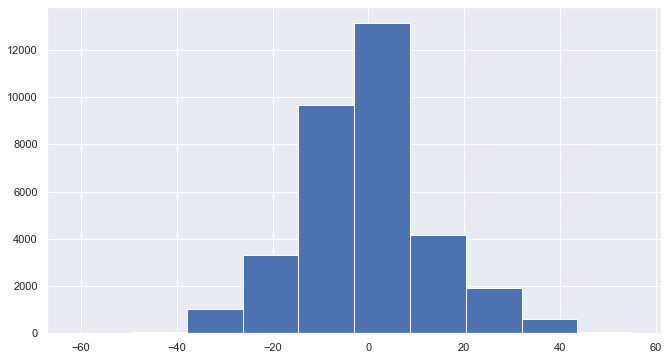

In [54]:
residuals = y_test - y_test_pred
residuals.hist()

In [55]:
residuals=residuals.abs()

In [58]:
test_shap_values = explainer(X_test)
#with open('explainer.txt', 'a') as out:
    #out.write(test_shap_values + '\n')


Permutation explainer: 33977it [25:59, 21.63it/s]                                        


In [59]:
residuals[residuals==residuals.max()]

38357    61.200756
Name: popularity, dtype: float64

In [60]:
X_test.index.get_loc(38357)

33243

In [61]:
y_test.loc[38357],y_test_pred[33243]


(8, 69.20075593207093)

In [62]:
X_test[residuals==residuals.max()]


,acousticness,artists,danceability,duration_ms,energy,explicit,liveness,loudness,mode,speechiness,tempo,valence,year,ins_2,ins_3
38357,0.00711,0.869383,0.506,0.048151,0.805,0,0.0856,0.876647,1,0.0469,0.517759,0.383,2015,1.0,0.0


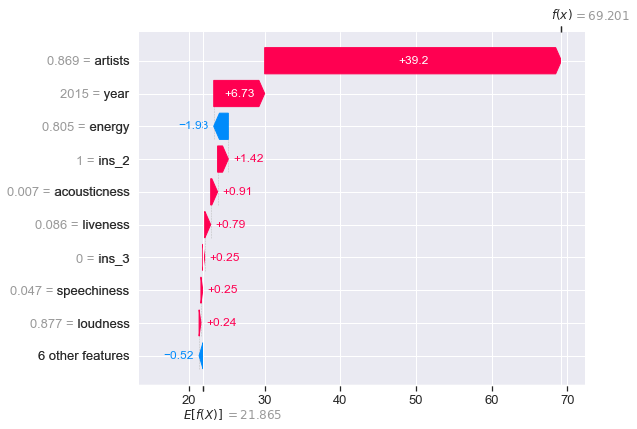

In [63]:
shap.plots.waterfall(test_shap_values[33243])

# New model - Decision Tree Model

### In this section we will try to use another model that is not Linear Regression
### 6.1 Option 1: Single run
### 6.2 Option 2: Loop 
### 6.3 Results

## 6.1 Option 1: Single run

In [64]:
# single run
tree = DecisionTreeRegressor(max_leaf_nodes=17, min_samples_split=2000)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train).clip(0, 100)
train_rmse = np.sqrt(mse(y_train, y_train_pred))
y_test_pred = tree.predict(X_test).clip(0, 100)
test_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f'rmse train: {train_rmse}, rmse test: {test_rmse}')
train_mae = mae(y_train, y_train_pred)
test_mae = mae(y_test, y_test_pred)
print(f'mae train: {train_mae}, mae test: {test_mae}')
train_r2 = r2(y_train, y_train_pred)
test_r2 = r2(y_test, y_test_pred)
print(f'r2 train: {train_r2}, r2 test: {test_r2}')

rmse train: 11.606791417405004, rmse test: 11.931456528344283
mae train: 7.835307192878601, mae test: 8.114525382504524
r2 train: 0.716382470156887, r2 test: 0.700476855350973


We can see small improvements over the linear regression model in the results above.

## 6.2 Option 2: Loop

We will try to improve the decision tree model by trying different number of max leaf nodes.

In [65]:
RMSE3_train, RMSE3_test, MAE3_train, MAE3_test, R23_train, R23_test = [], [], [], [], [], []

for i in range(5,100):
  tree = DecisionTreeRegressor(random_state = 15, max_leaf_nodes=i)
  tree.fit(X_train, y_train)
  y_train_pred = tree.predict(X_train).clip(0, 100)
  train_rmse = np.sqrt(mse(y_train, y_train_pred))
  train_mae = mae(y_train, y_train_pred)
  train_r2 = r2(y_train, y_train_pred)
  RMSE3_train.append(train_rmse.round(3))
  MAE3_train.append(train_mae.round(3))
  R23_train.append(train_r2.round(3))
  y_test_pred = tree.predict(X_test).clip(0, 100)
  test_rmse = np.sqrt(mse(y_test, y_test_pred))
  test_mae = mae(y_test, y_test_pred)
  test_r2 = r2(y_test, y_test_pred)
  RMSE3_test.append(test_rmse.round(3))
  MAE3_test.append(test_mae.round(3))
  R23_test.append(test_r2.round(3))
    
    

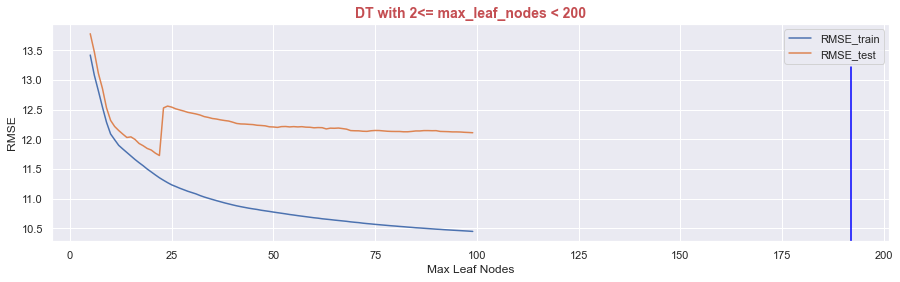

In [66]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 100)
ax = sns.lineplot(x=x, y=RMSE3_train)
sns.lineplot(x=x, y=RMSE3_test, ax=ax)
ax.axvline(x=192, ymin=0, ymax=0.8, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Max Leaf Nodes')
ax.set_ylabel('RMSE')
ax.set_title('DT with 2<= max_leaf_nodes < 200', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [67]:
print('Feature importances:')
for i, col in enumerate(X_train.columns):
  print(f'{col:12}: {tree.feature_importances_[i]:.3f}')

Feature importances:
acousticness: 0.009
artists     : 0.308
danceability: 0.001
duration_ms : 0.006
energy      : 0.004
explicit    : 0.019
liveness    : 0.003
loudness    : 0.005
mode        : 0.000
speechiness : 0.001
tempo       : 0.000
valence     : 0.004
year        : 0.618
ins_2       : 0.021
ins_3       : 0.000


In [68]:
## 6.3 Results

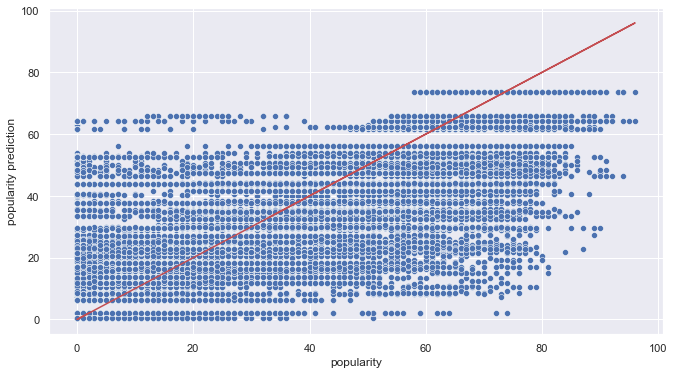

In [69]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('popularity prediction')
plt.show()

In [70]:
# minimum train rmse, mae and r2
print(f"minimum train rmse is: {min(RMSE3_train)}. in index: {RMSE3_train.index(min(RMSE3_train))}")
print(f"minimum train mae is: {min(MAE3_train)}. in index: {MAE3_train.index(min(MAE3_train))}")
print(f"maximum train r2 is: {max(R23_train)}. in index: {R23_train.index(max(R23_train))}")

minimum train rmse is: 10.449. in index: 94
minimum train mae is: 6.777. in index: 94
maximum train r2 is: 0.77. in index: 91


In [71]:
# minimum test rmse, mae and r2
print(f"minimum test rmse is: {min(RMSE3_test)}. in index: {RMSE3_test.index(min(RMSE3_test))}")
print(f"minimum test mae is: {min(MAE3_test)}. in index: {MAE3_test.index(min(MAE3_test))}")
print(f"maximum test r2 is: {max(R23_test)}. in index: {R23_test.index(max(R23_test))}")

minimum test rmse is: 11.728. in index: 17
minimum test mae is: 7.88. in index: 17
maximum test r2 is: 0.711. in index: 17


In [72]:
print(f"on index 17, train rmse = {RMSE3_train[RMSE3_test.index(min(RMSE3_test))]}, and test rmse = {RMSE3_test[17]}")
print(f"on index 17, train mae = {MAE3_train[MAE3_test.index(min(MAE3_test))]}, and test mae = {MAE3_test[17]}")
print(f"on index 17, train r2 = {R23_train[R23_test.index(max(R23_test))]}, and test r2 = {R23_test[17]}")

on index 17, train rmse = 11.353, and test rmse = 11.728
on index 17, train mae = 7.56, and test mae = 7.88
on index 17, train r2 = 0.729, and test r2 = 0.711


# Summary

| | Model  | RMSE    | MAE   | R2   |
|---:|:-------------|:-----------|:------|:------|
| 1 | KNN  | 19.501       | 15.729   | 0.306     |
| 2 | Linear Regression  | 18.194    | 14.557   | 0.307     |
| 3 | Improved Linear Regression  | 13.642    | 9.945   | 0.608     |
| 4 | Decision Tree Model - Single run  | 12.265    | 8.373   | 0.683     |
| 5 | Decision Tree Model - Loop  | 11.728    | 7.880   | 0.711     |

# Conclusions

In this project we tried to predict the popularity of songs on Spotify using the spotify song dataset.

We started with the KNN model, Linear Regression basic models, and then improved our results by feature engineering. Most of our work was to improve the features that had the most impact on our Linear Regression model, such as Artists.

Later we wanted to use a non-linear model to try and improve our results and picked the Decision Tree model. We acheived better results by using the new model as shown in the table above.
